In [296]:
import os
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [297]:
drive.mount('/content/drive/') 
os.chdir('/content/drive/My Drive/KNN_Memet')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [298]:
df = pd.read_csv("fetal_health.csv")
df.head()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [299]:
cols = df.columns
len(cols)

22

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

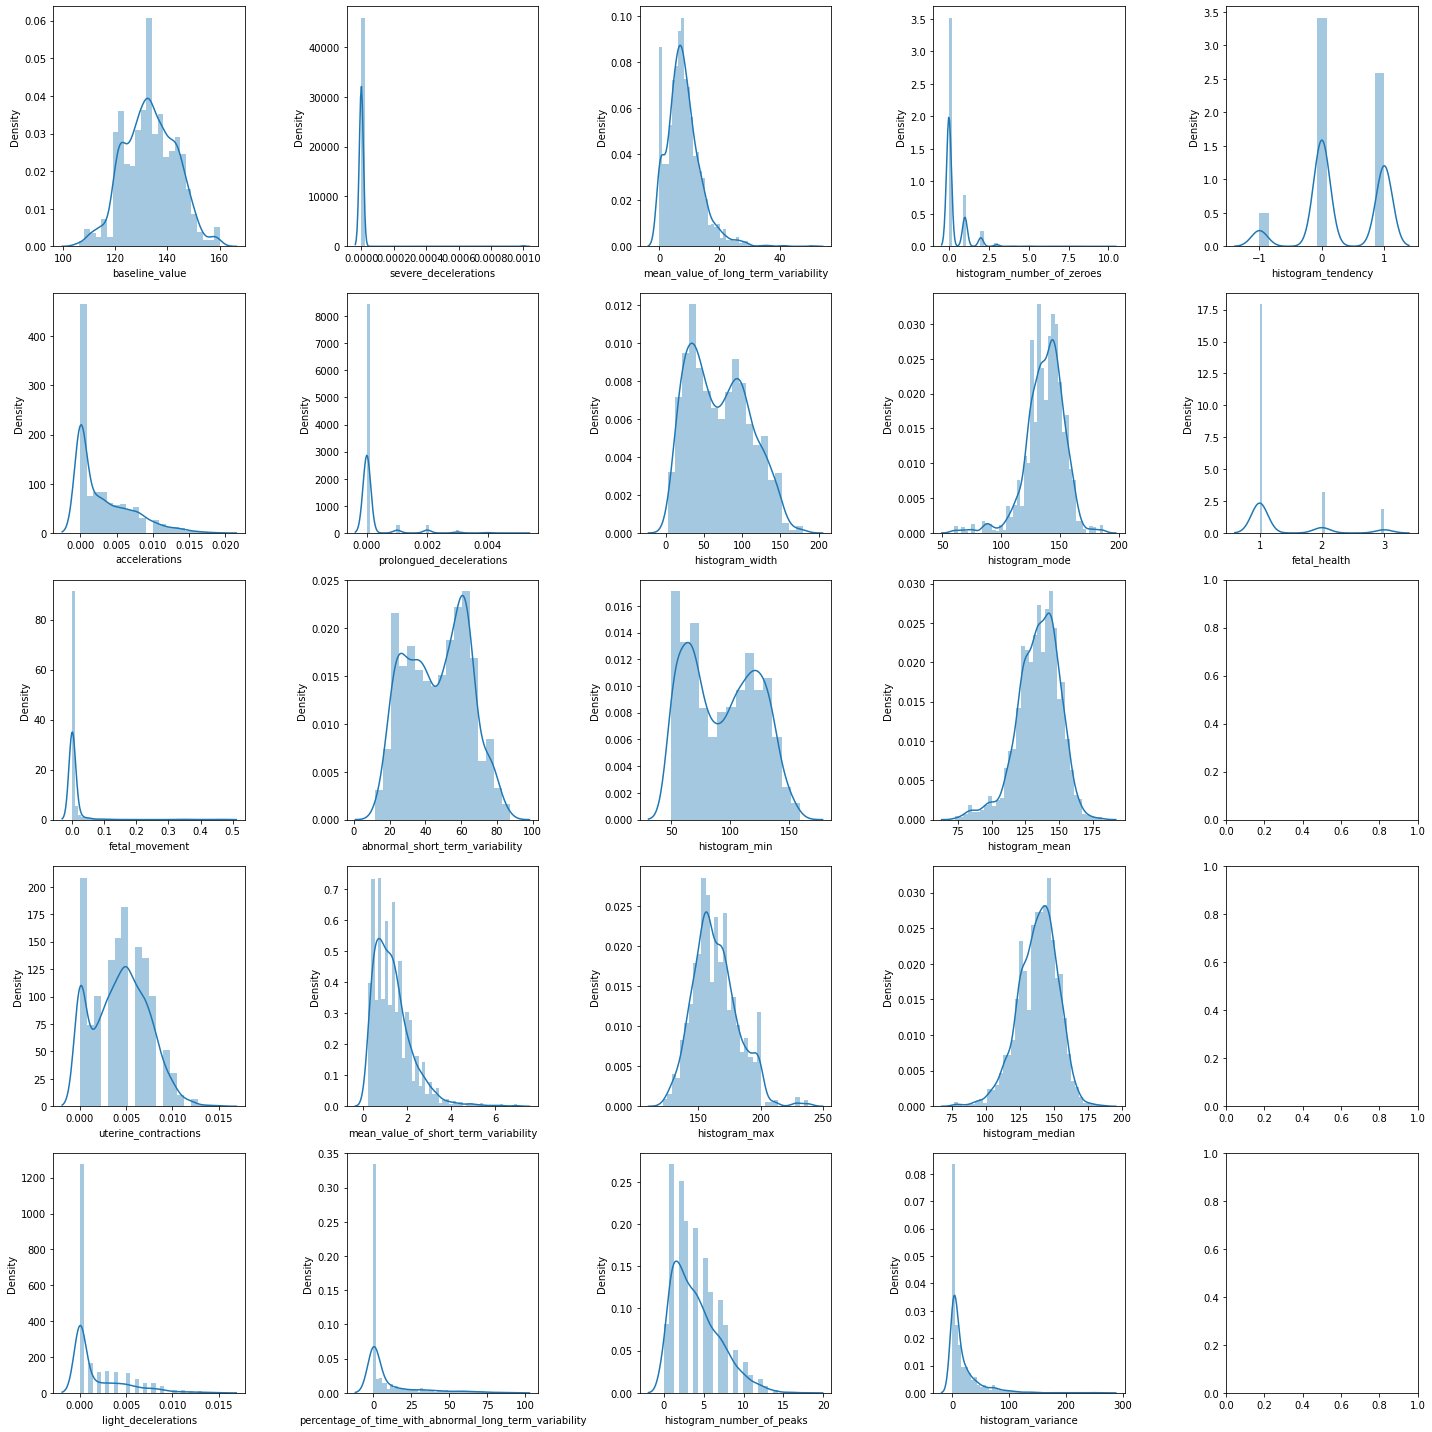

In [300]:
#Check the distribution of each features
fig, axes = plt.subplots(5,5, figsize=(20,20))
x,y = 0,0
for col in cols:
  sns.distplot(df[col], ax = axes[x][y])
  x+=1

  if x == 5:
    x = 0
    y += 1

fig.tight_layout()

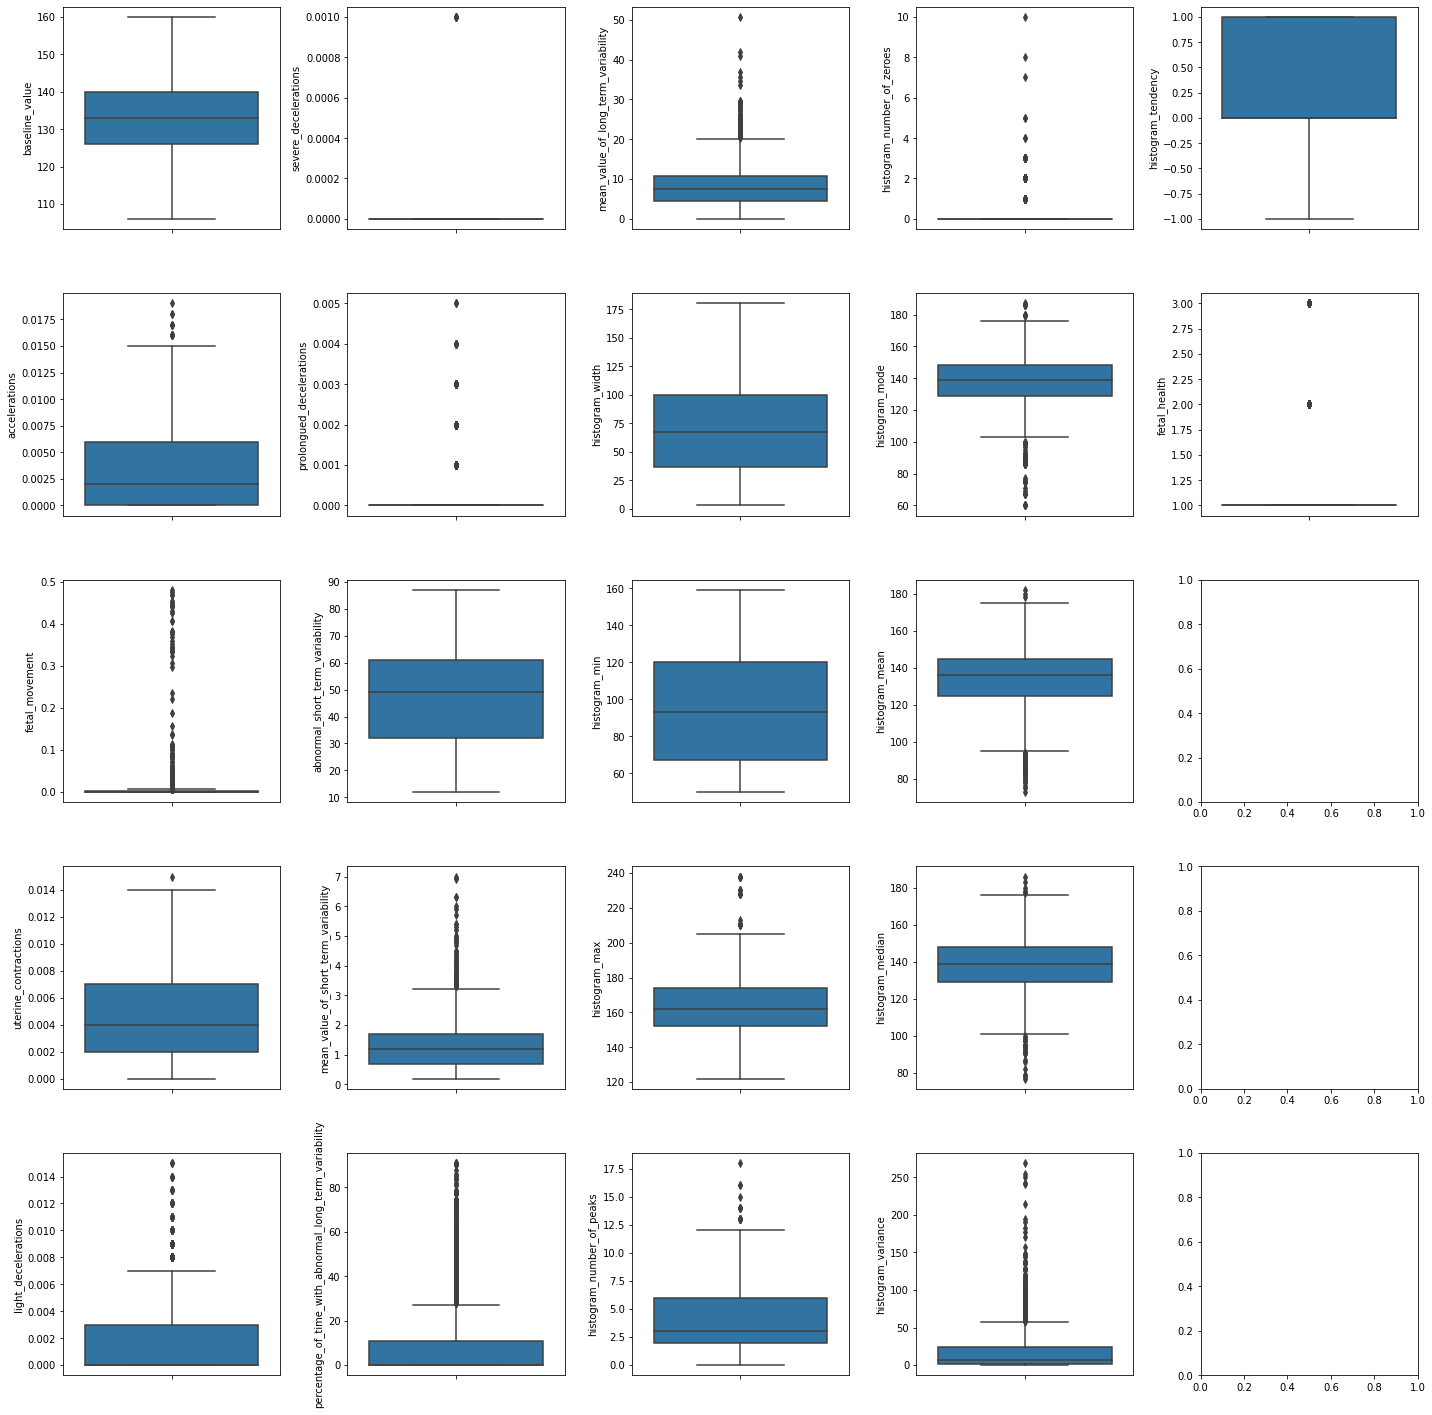

In [301]:
#Inspecting outliers
fig, axes = plt.subplots(5,5, figsize=(20,20))
x,y = 0,0
for col in cols:
  sns.boxplot(y=df[col], ax = axes[x][y])
  x+=1

  if x == 5:
    x = 0
    y += 1

fig.tight_layout()

# KNN Without Preprocessing

In [302]:
from sklearn.model_selection import train_test_split
X = df.drop("fetal_health", axis = 1)
y = df['fetal_health']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_test

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
1517,130.0,0.001,0.000,0.006,0.000,0.000,0.000,41.0,0.8,13.0,9.9,42.0,114.0,156.0,2.0,1.0,136.0,135.0,137.0,2.0,0.0
1879,138.0,0.000,0.002,0.009,0.011,0.000,0.002,57.0,2.6,0.0,0.7,106.0,55.0,161.0,6.0,1.0,135.0,107.0,122.0,121.0,1.0
1901,139.0,0.013,0.000,0.009,0.000,0.000,0.000,50.0,0.9,0.0,13.4,71.0,107.0,178.0,4.0,0.0,162.0,153.0,158.0,25.0,1.0
230,123.0,0.003,0.005,0.000,0.000,0.000,0.000,55.0,0.7,0.0,8.9,71.0,81.0,152.0,4.0,0.0,129.0,129.0,130.0,3.0,1.0
1796,143.0,0.010,0.000,0.001,0.000,0.000,0.000,59.0,0.8,0.0,7.2,72.0,96.0,168.0,3.0,0.0,152.0,146.0,150.0,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,132.0,0.000,0.000,0.007,0.001,0.000,0.000,47.0,0.7,1.0,11.2,31.0,114.0,145.0,1.0,0.0,136.0,134.0,136.0,2.0,1.0
509,157.0,0.008,0.000,0.003,0.000,0.000,0.000,49.0,0.7,0.0,3.3,38.0,154.0,192.0,2.0,0.0,161.0,167.0,166.0,9.0,-1.0
1793,121.0,0.000,0.001,0.005,0.012,0.001,0.000,66.0,2.1,0.0,0.0,102.0,55.0,157.0,5.0,1.0,67.0,83.0,90.0,98.0,-1.0
535,138.0,0.001,0.001,0.000,0.000,0.000,0.000,52.0,1.0,18.0,14.8,102.0,74.0,176.0,8.0,1.0,142.0,141.0,143.0,3.0,1.0


In [303]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
KNN.score(X_test, y_test)

0.9043887147335423

# With Preprocessing

In [304]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE

In [314]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
balancer = SMOTE()
X_scaled, y_scaled = balancer.fit_resample(X_scaled, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [398]:
KNN_2 = KNeighborsClassifier(n_neighbors=3)
cval_2 = cross_val_score(KNN_2, X_scaled, y_scaled, cv=5)
print(cval_2)
print(cval_2.mean())

[0.91238671 0.93252769 0.98590131 0.93252769 0.89526687]
0.9317220543806647


# Manual

In [307]:
def euclidean(r1, r2):
  return np.sqrt(np.sum((np.subtract(r1,r2))**2))

In [393]:
from statistics import mode
def classify(point, data, label, n):
  distances = []
  for i in range(len(data)):
    distances.append([euclidean(point, data[i]), label[i]])
  distances.sort(key=lambda x: x[0])
  top_classes = [x[1] for x in distances[0:n]]

  try:
    y_hat = mode(top_classes)
  except:
    y_hat = mode(top_classes[:-1])
  return y_hat


In [309]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y2, test_size=0.2)

In [261]:
def test(X_train, y_train, X_test, y_test, n):
  y_hat = [classify(point, X_train, y_train,n) for point in X_test]
  val = []
  for i in range(len(y_hat)):
    val.append(int(y_hat[i] == y_test[i]))
  return np.sum(val)/len(val)

**Result**

In [392]:
test(X_train, y_train, X_test, y_test, 4)

0.9798590130916415

**Result from library**

In [263]:
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9637462235649547

# Cross Validation Manual

In [387]:
def CValKNN(X, y, n, cv):
  results = []
  length = len(X)
  test_size = int((1/cv)*length)
  for fold in range(cv):
    print(f"Fold {fold}")

    X_train = np.concatenate((X[0:fold * test_size], X[fold *test_size + test_size:]))
    y_train = np.concatenate((y[0:fold * test_size], y[fold*test_size + test_size:]))
    X_test = X[fold * test_size:fold * test_size + test_size]
    y_test = y[fold * test_size:fold * test_size + test_size]


    res = test(X_train, y_train, X_test, y_test, n)
    print(f"Score: {res}")
    results.append(res)
  return results


In [388]:
CVal_results = CValKNN(X_scaled, y_scaled, 3, 5)


Fold 0
Score: 0.75730110775428
Fold 1
Score: 0.8731117824773413
Fold 2
Score: 0.919436052366566
Fold 3
Score: 0.9919436052366566
Fold 4
Score: 0.9617321248741189


**Result**

In [390]:
print(CVal_results)
print(np.mean(CVal_results))

[0.75730110775428, 0.8731117824773413, 0.919436052366566, 0.9919436052366566, 0.9617321248741189]
0.9007049345417926


**Result from library**

In [391]:
KNN_2 = KNeighborsClassifier(n_neighbors=3)
cval_2 = cross_val_score(KNN_2, X_scaled, y_scaled, cv=5)
print(cval_2)
print(cval_2.mean())

[0.91238671 0.93252769 0.98590131 0.93252769 0.89526687]
0.9317220543806647
